## Objetivo do modelo: 
### Distinguir com base na altura e largura da sépalas e da pétalas das flores qual o tipo de íris (espectro luminoso) que a flor apresenta. No caso as observações estão em cm. Os valores 0 representam a tipo íris setosa, o valor 1 indica o tipo Versicolor e o valor 2 indica o tipo Virginica

In [1]:
# importando as bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importando e visualizando a base de dados
iris = datasets.load_iris()
classes = ['Setosa', 'Versicolor', 'Virginica']
x = iris.data
y = iris.target

In [3]:
# transformando array em uma dataframe para facilitar a plotagem de gráficos
df = pd.DataFrame(x)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
display(df)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


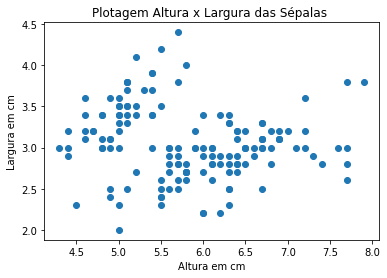

In [4]:
fig, ax = plt.subplots()
ax.scatter(df['sepal length'], df['sepal width'])
plt.title("Plotagem Altura x Largura das Sépalas ")
plt.xlabel("Altura em cm" )
plt.ylabel("Largura em cm")
plt.show()

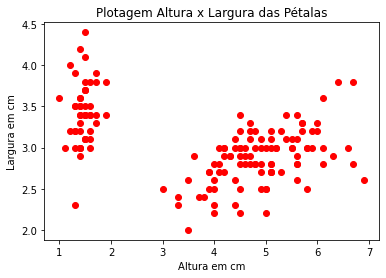

In [5]:
fig, ax = plt.subplots()
ax.scatter(df['petal length'], df['sepal width'], color = "red")
plt.title("Plotagem Altura x Largura das Pétalas")
plt.xlabel("Altura em cm" )
plt.ylabel("Largura em cm")
plt.show()

array([[<AxesSubplot:xlabel='sepal length', ylabel='sepal length'>,
        <AxesSubplot:xlabel='sepal width', ylabel='sepal length'>,
        <AxesSubplot:xlabel='petal length', ylabel='sepal length'>,
        <AxesSubplot:xlabel='petal width', ylabel='sepal length'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>,
        <AxesSubplot:xlabel='sepal width', ylabel='sepal width'>,
        <AxesSubplot:xlabel='petal length', ylabel='sepal width'>,
        <AxesSubplot:xlabel='petal width', ylabel='sepal width'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='petal length'>,
        <AxesSubplot:xlabel='sepal width', ylabel='petal length'>,
        <AxesSubplot:xlabel='petal length', ylabel='petal length'>,
        <AxesSubplot:xlabel='petal width', ylabel='petal length'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='petal width'>,
        <AxesSubplot:xlabel='sepal width', ylabel='petal width'>,
        <AxesSubplot:xlabel='petal length', ylabel='petal 

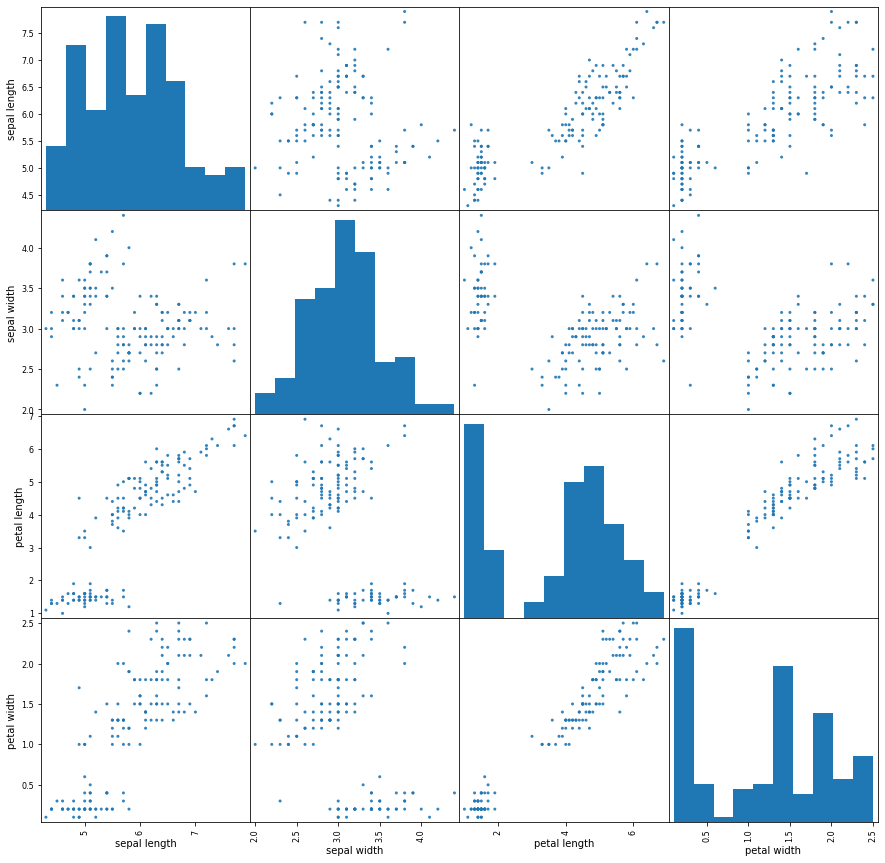

In [6]:
pd.plotting.scatter_matrix(df, figsize=(15,15), alpha = 0.9)

In [7]:
# seperando a nossa base de teste em 80% treino e em 20% teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [8]:
# verificando se a função separou corretamente em base de treino e base de teste
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [9]:
# definindo o modelo que será usado.
# Vamos usar o modelo K-Nearest Neighbors. Esse modelo consegue classificas as íris das flores com base em 
# um algoritmo que procura seu "vizinho" mais próximo com base nas variáveis da base de treinamento.

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print(prediction)
print(y_test)
acc = accuracy_score(y_test, prediction)
print(acc)

[1 0 0 0 0 1 0 2 1 2 1 2 2 0 0 2 2 2 2 0 0 0 1 2 0 1 0 1 0 0]
[1 0 0 0 0 1 0 2 1 2 2 2 2 0 0 2 2 2 2 0 0 0 1 1 0 1 0 1 0 0]
0.9333333333333333


In [10]:
predictions = knn.predict(x_test)
# Podemos verificar as respostas que o modelo entregou com a seguinte repetição:
for i in range(len(prediction)):
    print(classes[prediction[i]])

Versicolor
Setosa
Setosa
Setosa
Setosa
Versicolor
Setosa
Virginica
Versicolor
Virginica
Versicolor
Virginica
Virginica
Setosa
Setosa
Virginica
Virginica
Virginica
Virginica
Setosa
Setosa
Setosa
Versicolor
Virginica
Setosa
Versicolor
Setosa
Versicolor
Setosa
Setosa


In [11]:
#Podemos verificar os resultados comparados com os valores realmente esperados.
#Vemos que o nosso modelo possui uma acurácia de 93,3%, ou seja um valor consideravelmente alto!
prediction = knn.predict(x_test)
print(prediction)
print(y_test)
acc = accuracy_score(y_test, prediction)
print("A acurácia do modelo foi de: ", acc)

[1 0 0 0 0 1 0 2 1 2 1 2 2 0 0 2 2 2 2 0 0 0 1 2 0 1 0 1 0 0]
[1 0 0 0 0 1 0 2 1 2 2 2 2 0 0 2 2 2 2 0 0 0 1 1 0 1 0 1 0 0]
A acurácia do modelo foi de:  0.9333333333333333


In [12]:
X_new = np.array([[5,2.9,1,0.2]])
prediction1 = knn.predict(X_new)
print(prediction1)
print(classes[0])
# o nosso algoritmo classificou a nossa nova observação como íris setosa


[0]
Setosa
